In [1]:
# import libraries
%matplotlib inline
import torch
from torch.distributions.multinomial import Multinomial
import matplotlib.pyplot as plt

In [2]:
# sampling 100 of heads and tails by tossing a fair coin
probs = torch.tensor([0.5, 0.5])
sample = Multinomial(100, probs).sample()
sample

tensor([48., 52.])

In [3]:
# computing the frequencies
sample / 100

tensor([0.4800, 0.5200])

In [4]:
# simulating 10000 tosses 
Multinomial(10000, probs).sample() / 10000 

tensor([0.5006, 0.4994])

As you can see as the number of tosses is big, the frequencies of heads and tails get closer, this phenomenon is called the law of large numbers. And by definition of the central limit theorem, as the sample size (n) grows, the error goes down by at a rate of 1/sqrt(n).

In [5]:
# studying the effect of sampling a large sample on a coin of 2 outcomes (heads, tails)
sample = Multinomial(1, probs).sample((10000,))
sample_counts = sample.cumsum(dim=0)
sample_counts, sample_counts.shape

(tensor([[0.0000e+00, 1.0000e+00],
         [0.0000e+00, 2.0000e+00],
         [1.0000e+00, 2.0000e+00],
         ...,
         [4.9750e+03, 5.0230e+03],
         [4.9760e+03, 5.0230e+03],
         [4.9760e+03, 5.0240e+03]]),
 torch.Size([10000, 2]))

In [6]:
# computing an estimator
estimates = sample_counts / sample_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()
estimates,  estimates.shape

(array([[0.        , 1.        ],
        [0.        , 1.        ],
        [0.33333334, 0.6666667 ],
        ...,
        [0.4975995 , 0.50240046],
        [0.49764976, 0.5023502 ],
        [0.4976    , 0.5024    ]], dtype=float32),
 (10000, 2))

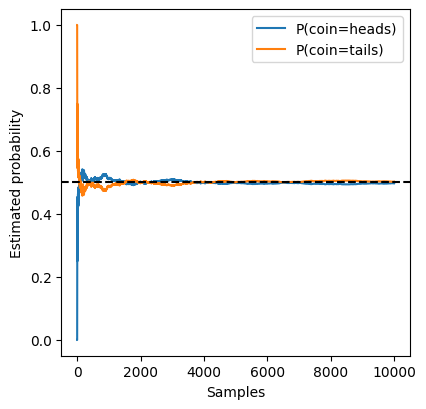

In [7]:
# drawing sample numbers vs the estimated probability of each outcome
plt.figure(figsize=(4.5, 4.5))
plt.plot(estimates[:, 0], label="P(coin=heads)")
plt.plot(estimates[:, 1], label="P(coin=tails)")
plt.axhline(y=0.5, color='black', linestyle='dashed') # line of the expected probability
plt.xlabel('Samples')
plt.ylabel('Estimated probability')
plt.legend()